In [31]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/s-a-nersisyan/HSE_bioinformatics_2021/master/seminar15/BRCA_pam50.tsv', index_col = 0, sep = '\t')

#X = df.iloc[:, :-1].to_numpy()
#y = df['Subtype'].to_numpy()

# PCA:

In [8]:
pca = PCA(n_components = 2)

df[['PC1', 'PC2']] = pca.fit_transform(df.iloc[:, :50])[:, :2]

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

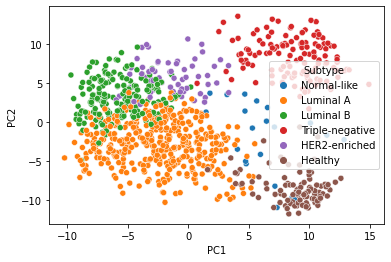

In [9]:
plt.tight_layout()
sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'Subtype', data = df)

# t-SNE

In [20]:
model = TSNE()
df[['t-sne-2d-one', 't-sne-2d-two']] = model.fit_transform(df.iloc[:, :50])

<AxesSubplot:xlabel='t-sne-2d-one', ylabel='t-sne-2d-two'>

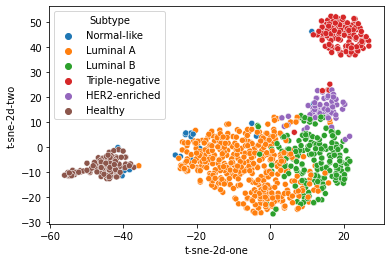

In [21]:
sns.scatterplot(x = 't-sne-2d-one', y = 't-sne-2d-two', data = df, hue = 'Subtype')

# K Neighbors

In [52]:
def cross_validation(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify = y, test_size = 0.2, random_state = 333
    )
    
    model = Pipeline([
        ('clf', KNeighborsClassifier(n_neighbors = 5, weights = 'uniform'))
    ])
    model.fit(X_train, y_train)
    
    accuracies = cross_val_score(
        model, X, y,
        scoring = make_scorer(accuracy_score),
        cv = RepeatedStratifiedKFold(n_repeats=150)
    )
    print(np.mean(accuracies), np.std(accuracies))
    
    params = {
        'clf__n_neighbors': [1,3,5,7,9, 10],
        'clf__weights': ['uniform', 'distance'],
        'clf__p': [1,2]
    }

    cv = GridSearchCV(
        model, params,
        scoring = make_scorer(accuracy_score),
        cv = RepeatedStratifiedKFold(n_repeats=125)
    )

    cv.fit(X, y)
    print(cv.best_params_)
    print(cv.best_score_)

## for PCA:

In [53]:
X1 = df[['PC1', 'PC2']].to_numpy()
y1 = df['Subtype']

cross_validation(X1, y1)

0.8446484517304188 0.020997409950933514
{'clf__n_neighbors': 9, 'clf__p': 2, 'clf__weights': 'uniform'}
0.8544874316939891


## result:
Euclidean metric, 9 neighbors, uniform weights (equally)

## for t-SNE:

In [54]:
X2 = df[['t-sne-2d-one', 't-sne-2d-two']].to_numpy()

cross_validation(X2, y1)

0.8898943533697632 0.0201966845135909
{'clf__n_neighbors': 5, 'clf__p': 2, 'clf__weights': 'distance'}
0.8907978142076503


## result:
Euclidean metric, 5 neighbors, weight points by the inverse of their distance